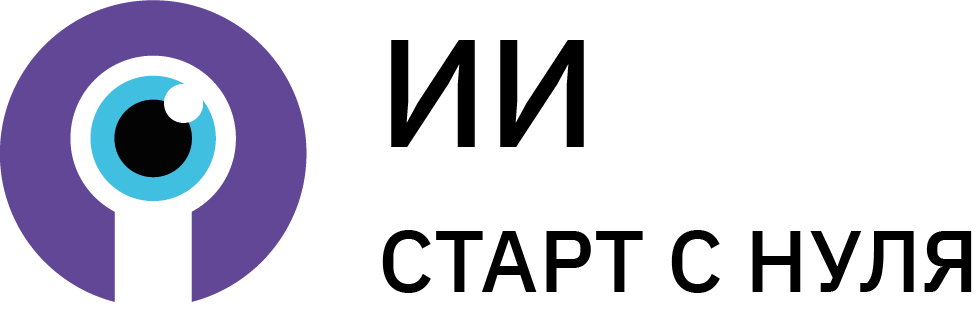

In [2]:
a = [1,2,3,7]
b = [5,6,7,8]

In [3]:
a[2]

3

In [4]:
import numpy as np

In [5]:
[x * y for x, y in zip(a, b)]

[5, 12, 21, 56]

In [6]:
aa = np.array(a); bb = np.array(b)
a, aa

([1, 2, 3, 7], array([1, 2, 3, 7]))

In [7]:
aa * bb

array([ 5, 12, 21, 56])

In [8]:
import sklearn.datasets

In [9]:
x, y = sklearn.datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

In [10]:
x[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [11]:
y = y.astype('int32')

In [12]:
x.shape

(70000, 784)

In [13]:
def sq(a): return np.copy(a).reshape(28, 28)

In [14]:
x[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [15]:
x1 = x / 255

In [16]:
np.array([1, 2, 3])*np.array([3,4,5])

array([ 3,  8, 15])

In [17]:
a = [1,2,3]
[i + 1 for i in a]

[2, 3, 4]

In [18]:
y[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=int32)

In [19]:
import matplotlib
import matplotlib.pyplot as plt

In [20]:
def draw(d):
    plt.imshow(d, cmap = matplotlib.cm.binary)
    plt.axis("off")
    plt.show()  

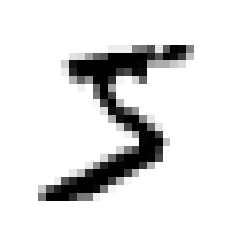

5

In [21]:
i = 0
draw(sq(x[i]))
y[i]

In [22]:
np.mean(x1[y == 4])

0.12155294049038126

In [23]:
def count_areas(a):
    eps = 5/255
    def dfs(x, y):
        nonlocal a, v, eps
        #print(x, y)
        if not (0 <= x < len(a) and 0 <= y < len(a[x]) and a[x][y] < eps):
            return
        a[x][y] = v
        dfs(x + 1, y)
        dfs(x, y + 1)
        dfs(x - 1, y)
        dfs(x, y - 1)

        dfs(x + 1, y + 1)
        dfs(x - 1, y + 1)
        dfs(x - 1, y - 1)
        dfs(x + 1, y - 1)
    
    v = 1
    for x in range(len(a)):
        for y in range(len(a[x])):
            #print(x, y, a[x, y])
            if a[x][y] < eps:
                v += 1
                dfs(x, y)
    return v - 1

In [24]:
count_areas(sq(x1[13]))

2

In [25]:
ones = np.where(y==1)
#ones
ones[0][:20]

array([  3,   6,   8,  14,  23,  24,  40,  59,  67,  70,  72,  77,  78,
        99, 102, 104, 105, 112, 113, 124])

In [26]:
def edge_weight(a):
    b = np.abs(a[:-1]-a[1:])
    return np.sum(b) / np.sum(a)

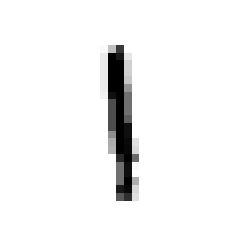

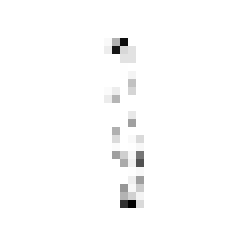

42.64313725490196 8.729411764705883 0.20470847894059227


In [27]:
a = sq(x1[8])
b = np.abs(a[:-1]-a[1:])
draw(a)
draw(b)
print(np.sum(a), np.sum(b), np.sum(b) / np.sum(a))

In [28]:
import random

In [29]:
random.choice([1, 2, 3])

1

In [30]:
def predict_7(a):
    return 7

In [31]:
def predict_random(a):
    return random.choice(list(range(10)))

In [32]:
predict_random(1)

4

In [33]:
def predict_areas(a):
    c = count_areas(sq(a))
    if c >= 3:
        return 8
    if c >= 2:
        return random.choice([6, 9, 0])
    return random.choice([1, 2, 3, 4, 5, 7])

In [34]:
def predict_areas_1(a):
    c = count_areas(sq(a))
    if c >= 3:
        return 8
    if c >= 2:
        return random.choice([6, 9, 0])
    if edge_weight(sq(a)) < 0.3: #
        return 1
    return random.choice([2, 3, 4, 5, 7])

In [35]:
predict_areas(x1[17])

8

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
predict_7(x1[1])

7

In [38]:
predicted = list(map(predict_areas_1, x1[:2000]))

In [39]:
print(confusion_matrix(predicted, y[:2000]))
print(classification_report(predicted, y[:2000]))

[[ 64   0  23   3   4   6  34   0  20  56]
 [  1 111   1   4  27   0  18  12   1   1]
 [  1  30  18  35  37  28  11  50   2   3]
 [  2  18  28  32  25  30  12  44   0   5]
 [  4  17  25  40  34  34  17  46   1   6]
 [  4  24  26  31  51  35   7  40   0   6]
 [ 54   0  21   5   6   6  47   2  19  54]
 [  1  20  26  34  23  29  13  30   0   3]
 [  5   0   6   0   2   4  11   0 109   6]
 [ 55   0  24   7   5   8  30   0  20  70]]
              precision    recall  f1-score   support

           0       0.34      0.30      0.32       210
           1       0.50      0.63      0.56       176
           2       0.09      0.08      0.09       215
           3       0.17      0.16      0.17       196
           4       0.16      0.15      0.16       224
           5       0.19      0.16      0.17       224
           6       0.23      0.22      0.23       214
           7       0.13      0.17      0.15       179
           8       0.63      0.76      0.69       143
           9       0.33     

In [40]:
np.where((np.array(predicted)==8) & (y[:2000] != 8))

(array([  73,   80,   81,   87,   93,  155,  292,  299,  457,  527,  531,
         551,  555,  563,  597,  607,  622,  635,  778, 1137, 1159, 1165,
        1209, 1235, 1263, 1503, 1512, 1610, 1674, 1707, 1779, 1802, 1820,
        1920]),)

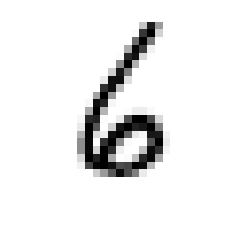

In [41]:
draw(sq(x[1779]))

In [42]:
y_hot = np.eye(10)[y.astype('int32')]
#y_hot = y_hot.T.reshape(10, y.shape[0])
len(y_hot)
# y[1], len(y_hot[1])

70000

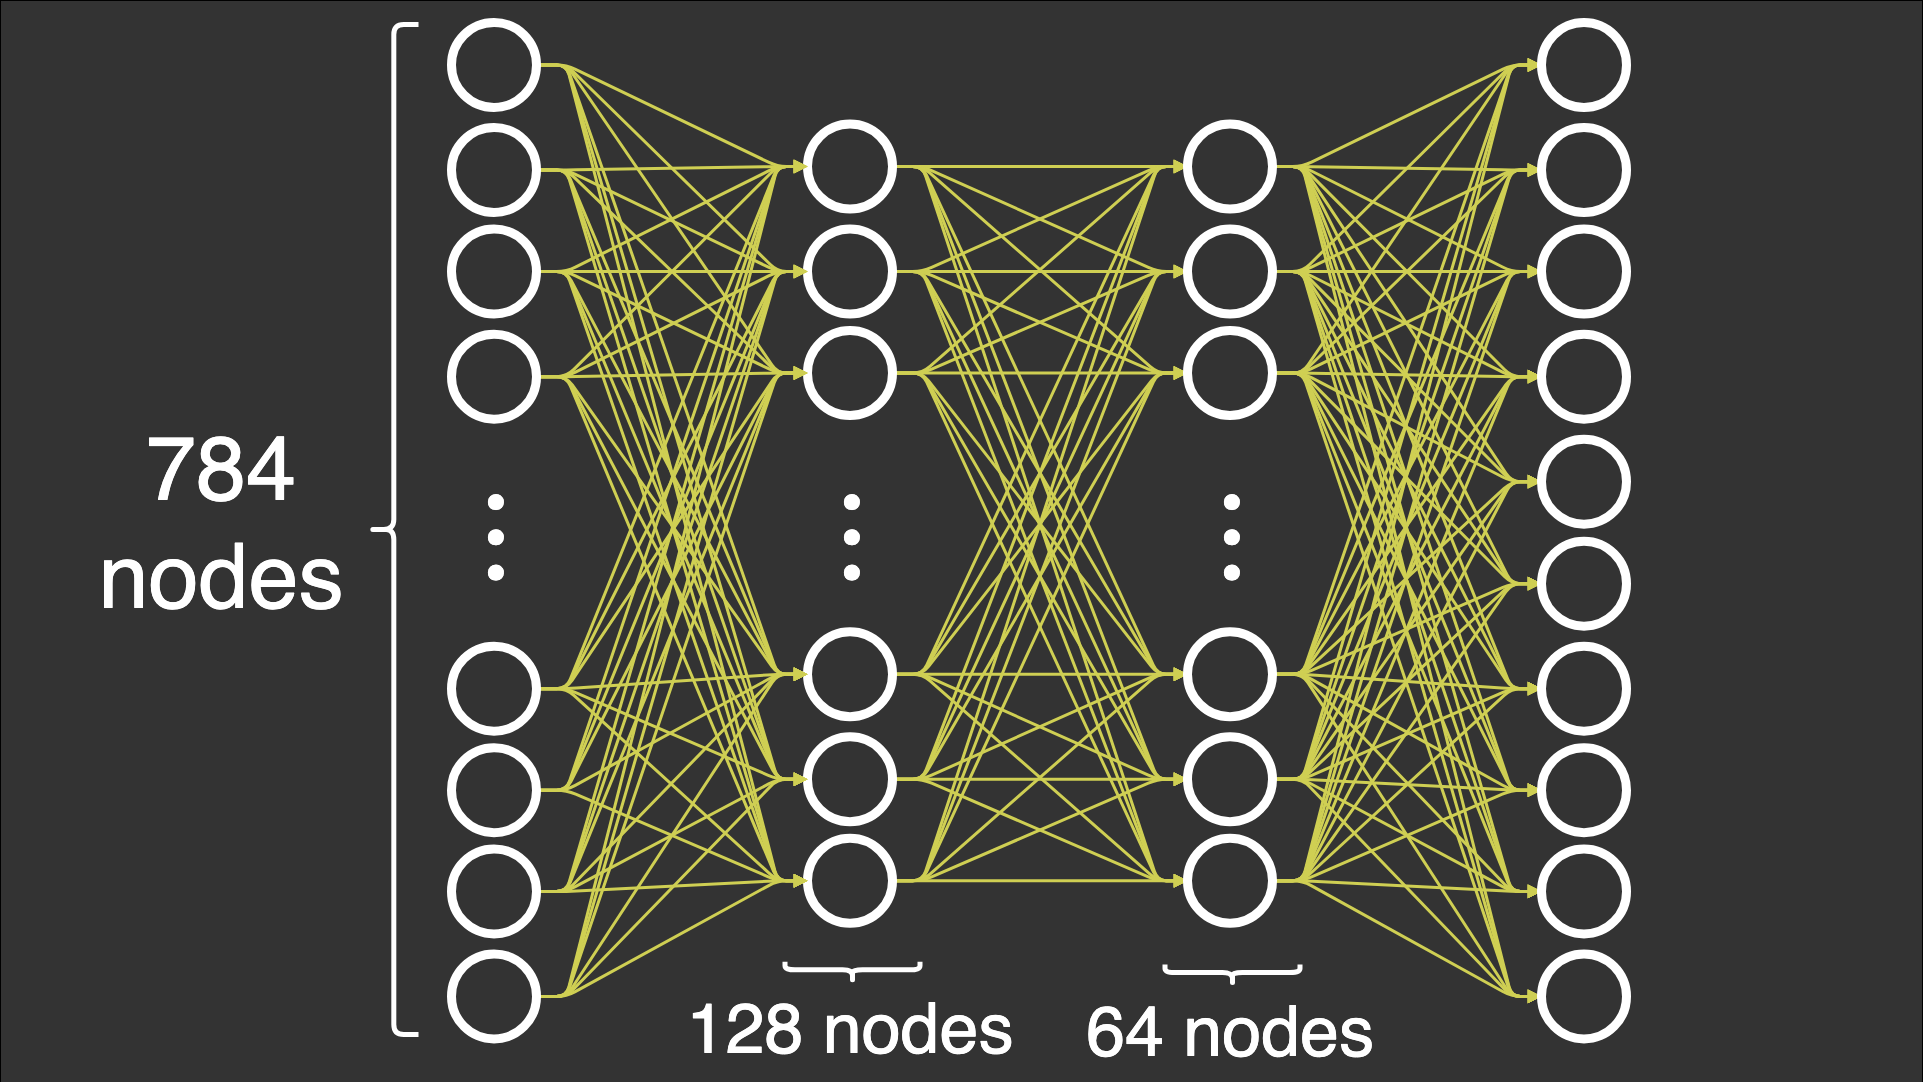

In [43]:
x1.shape

(70000, 784)

In [44]:
m_train = 50000
m_test = x1.shape[0] - m_train

x_train, x_test = x1[:m_train].T, x1[m_train:].T
y_train, y_test = y_hot.T[:,:m_train], y_hot.T[:,m_train:]

In [45]:
y_train.shape

(10, 50000)

$$ \hat{y} = \sigma(w^T x + b). $$

$$ \sigma(z) = \frac{1}{1 + e^{-z}}. $$


In [46]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [47]:
def plot_func(f):
    x = np.linspace(-5,5,100)
    y = f(x)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.plot(x,y, 'g')
    plt.show()

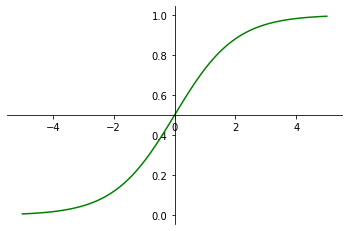

In [48]:
plot_func(sigmoid)

$y = y'$

$$ softmax(z_i) = \frac{e^{z_i}}{\sum_{j=0}^{9} e^{z_j}}.$$

In [49]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

$$ L(y, \hat{y}) = -\sum_{i = 0}^n y_i \log(\hat{y}_i). $$

$$ L(Y, \hat{Y}) = - \frac{1}{m} \sum_{j = 0}^m \sum_{i = 0}^n y_i^{(j)} \log(\hat{y}_i^{(j)}). $$

In [50]:
def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    L = -(1./m) * (
        np.sum( np.multiply(np.log(Y_hat), Y) ) +
        np.sum( np.multiply(np.log(1 - Y_hat), (1 - Y)) )
    )

    return L

In [54]:
def train(X, Y):
    m = X.shape[1]
    n_x = X.shape[0]
    n_h = 64
    learning_rate = 1

    W1 = np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(10, n_h)
    b2 = np.zeros((10, 1))

    for i in range(61):

        Z1 = np.matmul(W1, X) + b1
        A1 = sigmoid(Z1)
        Z2 = np.matmul(W2, A1) + b2
        A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

        cost = compute_multiclass_loss(Y, A2)

        dZ2 = A2-Y
        dW2 = (1./m) * np.matmul(dZ2, A1.T)
        db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

        dA1 = np.matmul(W2.T, dZ2)
        dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
        dW1 = (1./m) * np.matmul(dZ1, X.T)
        db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

        W2 = W2 - learning_rate * dW2
        b2 = b2 - learning_rate * db2
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1

        if (i % 10 == 0):
            print("Epoch", i, "cost: ", cost)

    #print("Final cost:", cost)
    return (W1, b1, W2, b2)

In [55]:
y_train.shape

(10, 50000)

In [56]:
(W1, b1, W2, b2) = train(x_train, y_train)

Epoch 0 cost:  10.68405005104557
Epoch 10 cost:  2.718382188800099
Epoch 20 cost:  1.7716562953827155
Epoch 30 cost:  1.3804141883249759
Epoch 40 cost:  1.1705035811170788
Epoch 50 cost:  1.0383026926243182
Epoch 60 cost:  0.946152112455557


In [57]:
W1

array([[-2.49924795, -0.56827608, -0.73489694, ..., -0.70587486,
         0.72625184,  0.59732388],
       [-0.8234709 ,  0.70768956, -0.11484545, ...,  1.27350235,
        -0.96209955,  0.82378537],
       [ 0.61759672,  1.64902739,  0.3670668 , ..., -1.3240691 ,
         0.51262554,  0.18854242],
       ...,
       [ 0.16311803,  1.83953295,  0.22815959, ...,  0.50201562,
         0.49235277, -0.1677447 ],
       [ 1.73869009,  0.88677232, -1.05180125, ...,  0.4269205 ,
         1.82566173,  0.69460329],
       [ 0.42553523, -0.3622422 , -1.18356007, ...,  0.25128126,
        -0.10166437,  0.06304787]])

In [58]:
Z1 = np.matmul(W1, x_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predicted = np.argmax(A2, axis=0)

In [59]:
A2

array([[4.09639447e-05, 7.19051708e-03, 4.27179745e-02, ...,
        4.94536317e-04, 1.27971884e-03, 4.46021741e-03],
       [1.52698271e-02, 3.57128488e-03, 5.60059669e-06, ...,
        1.24256143e-03, 2.01927987e-03, 3.71312310e-07],
       [2.00416150e-01, 5.75826569e-02, 3.55633699e-02, ...,
        2.94908806e-02, 5.79130146e-04, 1.06165206e-02],
       ...,
       [4.57814963e-03, 4.14489938e-04, 4.51921858e-02, ...,
        3.12075803e-02, 2.59962900e-04, 1.59092795e-04],
       [1.47361542e-03, 3.10977436e-01, 5.46508456e-05, ...,
        4.70520550e-01, 2.49949715e-03, 1.24169223e-05],
       [7.10831384e-04, 1.10633222e-01, 1.45960963e-03, ...,
        3.74267341e-01, 9.73292634e-04, 6.15342344e-05]])

In [60]:
with np.printoptions(precision=3, suppress=True):
    print(A2[:,992])

[0.    0.005 0.08  0.007 0.013 0.004 0.    0.491 0.069 0.331]


In [61]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=int32)

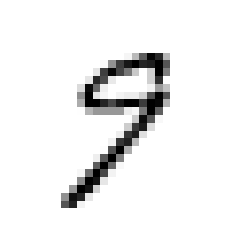

In [62]:
draw(sq(x1[m_train + 9992]))

In [63]:
np.argmax(A2[:,1])

3

In [64]:
y[m_train:]

array([3, 8, 6, ..., 4, 5, 6], dtype=int32)

In [65]:
print(confusion_matrix(predicted, y[m_train:]))
print(classification_report(predicted, y[m_train:]))

[[1621    2   38   48   13  140   44   17   30   17]
 [   0 2029   78    9    8   22   18   18   62   15]
 [  51    8 1298   90   53   68   74   32  122   39]
 [  24   11  130 1408   24  231    9   31  204   66]
 [  10    9  104   15 1377   47  112   44   46  262]
 [ 130    6   20  159   34 1048   76   32  141   84]
 [  66   29  149   55   75   50 1530   31   39   18]
 [  13   21   71   26   61   20   27 1672   36  179]
 [  41   67   92  182   75  128   25   44 1221   85]
 [  15   17   42   48  245   53   10  197   82 1205]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1970
           1       0.92      0.90      0.91      2259
           2       0.64      0.71      0.67      1835
           3       0.69      0.66      0.67      2138
           4       0.70      0.68      0.69      2026
           5       0.58      0.61      0.59      1730
           6       0.79      0.75      0.77      2042
           7       0.79      0.79   

In [66]:
np.where(predicted != y[m_train:])

(array([    1,     5,     7, ..., 19986, 19990, 19997]),)